# Problem 6 (30 Points)

During the lecture you worked with pipelines in SciKit-Learn to perform feature transformation before classification/regression using a pipeline. In this problem, you will look at another scaling method in a 2D regression context.

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
Sklearn Models (no scaling): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Sklearn Pipeline (scaling + model): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Plots
- 1x5 subplot showing model predictions on unscaled features, next to ground truth
- 1x5 subplot showing pipeline predictions with features scaled, next to ground truth

Questions
- Respond to the prompts at the end

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot(X, y, title=""):
    plt.scatter(X[:,0],X[:,1],c=y,cmap="jet")
    plt.colorbar(orientation="horizontal")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)

## Load the data

Complete the loading process below by inputting the path to the data file "w6-p1-data.npy"

Training data is in `X_train` and `y_train`.
Testing data is in `X_test` and `y_test`.

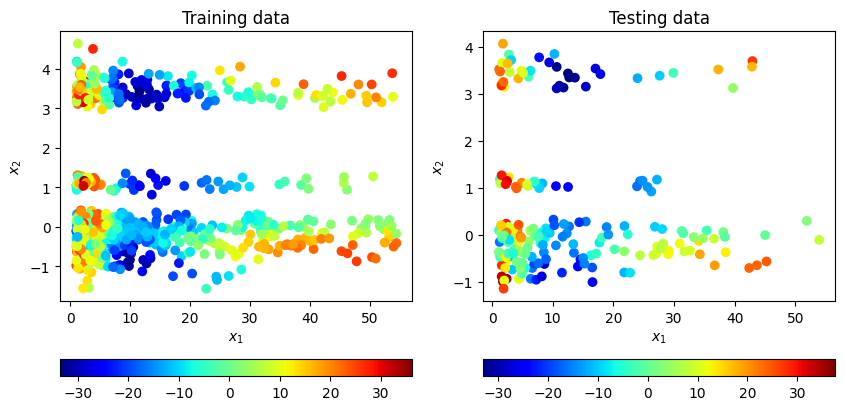

In [2]:
# Define path
data = np.load("data/w6-p1-data.npy")
X, y = data[:,:2], data[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.8*len(y)),random_state=0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(X_train, y_train, "Training data")
plt.subplot(1,2,2)
plot(X_test, y_test, "Testing data")
plt.show()

## Models (no input scaling)
Fit 4 models to the training data:
- `LinearRegression()`. This should be a pipeline whose first step is `PolynomialFeatures()` with degree 7.
- `SVR()` with C = 1000 and "rbf" kernel
- `KNeighborsRegressor()` using 4 nearest neighbors
- `RandomForestRegressor()` with 100 estimators of max depth 10

Print the Train and Test MSE for each

In [17]:
model_names = ["LSR", "SVR", "KNN", "RF"]
linear_regression_model = Pipeline([("Polynomial Features", PolynomialFeatures(7)), ("Linear Regression", LinearRegression())])
svr_model = SVR(C=1000, kernel='rbf')
k_neighbors_regressor_model = KNeighborsRegressor(n_neighbors=4)
random_forest_regressor_model = RandomForestRegressor(n_estimators=100, max_depth=10)
models = [linear_regression_model, svr_model, k_neighbors_regressor_model, random_forest_regressor_model]

linear_regression_model.fit(X_train, y_train)
print(f"Model: {model_names[0]}")
print(f"\tTrain MSE: {mean_squared_error(y_train, linear_regression_model.predict(X_train))}")
print(f"\tTest MSE: {mean_squared_error(y_test, linear_regression_model.predict(X_test))}")
print()

svr_model.fit(X_train, y_train)
print(f"Model: {model_names[1]}")
print(f"\tTrain MSE: {mean_squared_error(y_train, svr_model.predict(X_train))}")
print(f"\tTest MSE: {mean_squared_error(y_test, svr_model.predict(X_test))}")
print()

k_neighbors_regressor_model.fit(X_train, y_train)
print(f"Model: {model_names[2]}")
print(f"\tTrain MSE: {mean_squared_error(y_train, k_neighbors_regressor_model.predict(X_train))}")
print(f"\tTest MSE: {mean_squared_error(y_test, k_neighbors_regressor_model.predict(X_test))}")
print()

random_forest_regressor_model.fit(X_train, y_train)
print(f"Model: {model_names[3]}")
print(f"\tTrain MSE: {mean_squared_error(y_train, random_forest_regressor_model.predict(X_train))}")
print(f"\tTest MSE: {mean_squared_error(y_test, random_forest_regressor_model.predict(X_test))}")
print()

Model: LSR
	Train MSE: 50.86638993713532
	Test MSE: 57.28678105844514

Model: SVR
	Train MSE: 82.0435260356599
	Test MSE: 98.6331971940729

Model: KNN
	Train MSE: 26.856498566141628
	Test MSE: 47.63617328402055

Model: RF
	Train MSE: 6.062402310735133
	Test MSE: 25.269558058004133



## Visualizing the predictions
Plot the predictions of each method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.

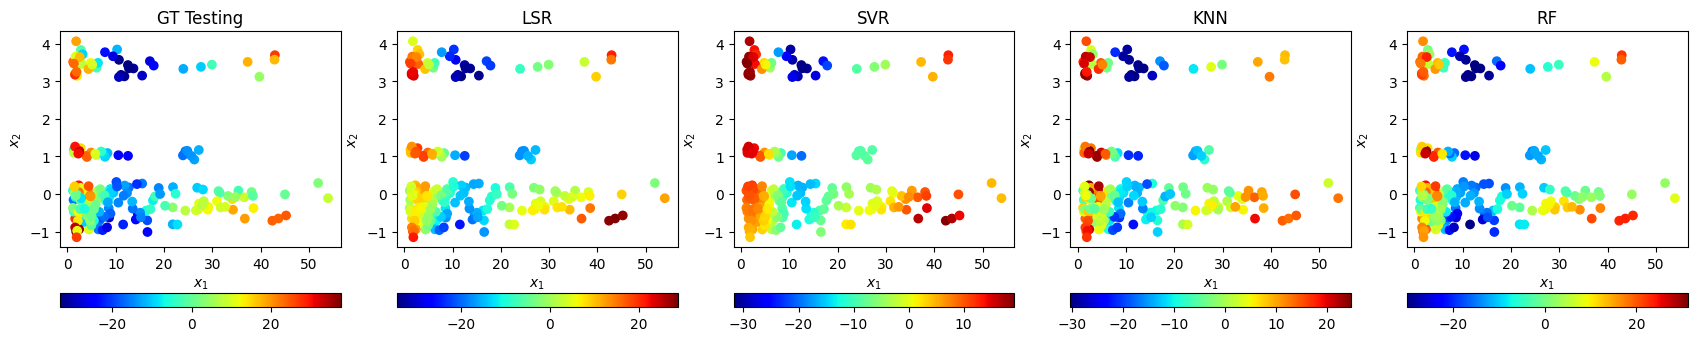

In [18]:
plt.figure(figsize=(21,4))
plt.subplot(1,5,1)
plot(X_test, y_test, "GT Testing")

plt.subplot(1,5,2)
plot(X_test, linear_regression_model.predict(X_test), model_names[0])

plt.subplot(1,5,3)
plot(X_test, svr_model.predict(X_test), model_names[1])

plt.subplot(1,5,4)
plot(X_test, k_neighbors_regressor_model.predict(X_test), model_names[2])

plt.subplot(1,5,5)
plot(X_test, random_forest_regressor_model.predict(X_test), model_names[3])

plt.show()

## Quantile Scaling

A `QuantileTransformer()` can transform the input data in a way that attempts to match a given distribution (uniform distribution by default).  
- Create a quantile scaler with `n_quantiles = 800`.
- Then, create a pipeline for each of the 4 types of models used earlier
- Fit each pipeline to the training data, and again print the train and test MSE

In [19]:
pipeline_names = ["LSR, scaled", "SVR, scaled", "KNN, scaled", "RF, scaled"]
pipelines = []
models = [Pipeline([("Polynomial Features", PolynomialFeatures(7)), ("Linear Regression", LinearRegression())]), 
          SVR(C=1000, kernel='rbf'),
          KNeighborsRegressor(n_neighbors=4),
          RandomForestRegressor(n_estimators=100, max_depth=10)]

quantile_transformer = QuantileTransformer(n_quantiles=800)
for i in range(len(models)):
    pipelines.append(Pipeline([("Quantile Transformer", quantile_transformer),(model_names[i], models[i])]))
    pipelines[i].fit(X_train, y_train)
    print(f"Pipeline: {pipeline_names[i]}")
    print(f"\tTrain MSE: {mean_squared_error(y_train, pipelines[i].predict(X_train))}")
    print(f"\tTest MSE: {mean_squared_error(y_test, pipelines[i].predict(X_test))}")
    print()

Pipeline: LSR, scaled
	Train MSE: 39.52893428670383
	Test MSE: 43.20363492250739

Pipeline: SVR, scaled
	Train MSE: 41.03425800595979
	Test MSE: 43.01791573789805

Pipeline: KNN, scaled
	Train MSE: 19.687691313922564
	Test MSE: 36.397038931930005

Pipeline: RF, scaled
	Train MSE: 5.888809338714675
	Test MSE: 24.58464102739502



## Visualization with scaled input
As before, plot the predictions of each *scaled* method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.  

This time, for each plot, show the scaled data points instead of the original data. You can do this by calling `.transform()` on your quantile scaler. The scaled points should appear to follow a uniform distribution.

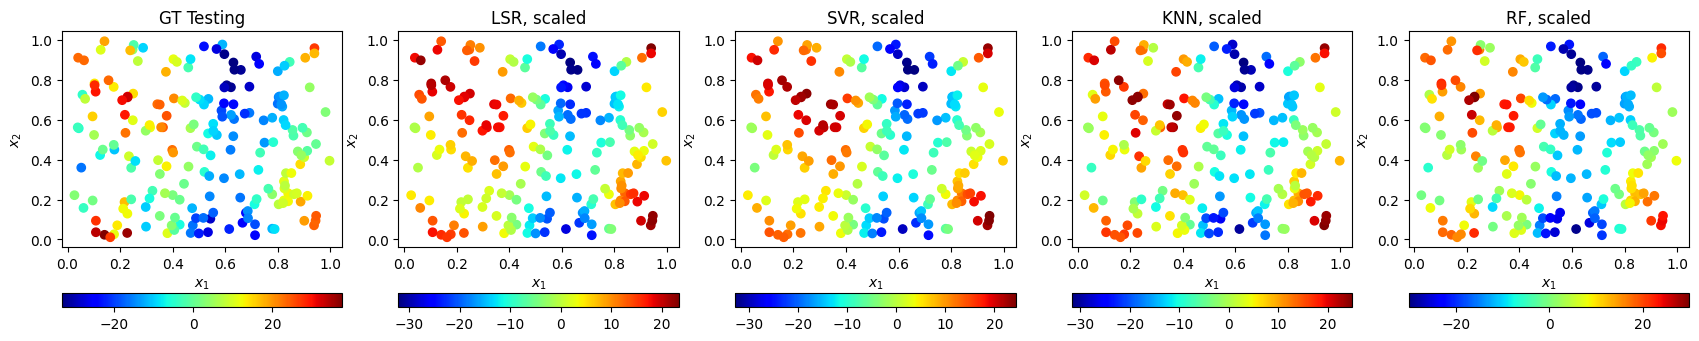

In [20]:
plt.figure(figsize=(21,4))
plt.subplot(1,5,1)
plot(quantile_transformer.transform(X_test), y_test, "GT Testing")

i = 2
for pipeline in pipelines:
    plt.subplot(1,5,i)
    plot(quantile_transformer.transform(X_test), pipeline.predict(X_test), pipeline_names[i-2])
    i += 1

plt.show()

## Questions

1. Without transforming the input data, which model performed the best on test data? What about after scaling?  

    The random forest model performed the best before scaling and after scaling but it performec better by a smaller margin after scaling. 

2. For each method, say whether scaling the input improved or worsened, how extreme the change was, and why you think this is.  

    LSR: Improved a little bit from scaling because the uniform distribution allows the final fitted result to better see patterns in the data that can't otherwise be seen with a clumped data.

    SVR: Improved a lot from scaling because SVR does better with more uniformly distributed data sets. This type of scaling reduces the impact of outlier data which can have a large effect on the final weightings of the SVR model. Escpecially with the relatively high C value, the impact of outlier data crossin boundaries can be very detrimental to the final fitted model.

    KNN: Improved a little bit from scaling because it allows spreads out the data points in a more uniform way allowing for better choosing between which points closest have the most influence. It doesn't improve a whole lot though because the data is already spread out a little bit in the x1 direction.

    RF: Improved by a very small margin but hardly noticeable. This is because this type of model already averages a number of of different models to random numbers of points thus incorporating features from the data that the change in distribution would normally allow other models to see.